# Self Consistent Field Calculation Interface

This notebook is an interface to handle the SCF calculation and also for visualization of the results

At first we would like to import the main modules and packages which we will need for our purposes.\
`ExecutorSCF` is class responsible for calculation of the SCF procedure.\
`ExecutorSCF.run_calculation` returns an object which carries the state of converged calculation.\
`OutputHandlerSCF` is responsible for manipulation of object returned by the `ExecutorSCF.run_calculation`

In [1]:
import numpy as np
import json
from SCF_method.calculation_executor import ExecutorSCF
from SCF_method.output_handler import OutputHandlerSCF

Input object for the `ExecutorSCF` initialization is input dictionary\
Input dictionary can be easily obtained from the json file as some human readable data container\
To obtain the data for calculation we wil use this script:

In [2]:
with open('SCF_method\input_data\H2_gaussian.json') as input_file:
    input_dict = json.load(input_file)
input_dict

{'molecule_definition': {'nuclei_positions': [[0, 0, 0.70053],
   [0, 0, -0.70053]],
  'atomic_numbers': [1, 1],
  'number_of_electrons': 2},
 'basis': {'type': 'gaussian',
  'params': {'alphas': [4.3448, 0.66049, 0.13669],
   'nuclei_positions': [[0, 0, 0.70053], [0, 0, -0.70053]],
   'normalization_factors': [[1, 1, 1], [1, 1, 1]]}},
 'integration_config': {'type': 'MC',
  'n_samples': 50000000,
  'boundaries': [-7, 7]},
 'convergence_config': {'max_iteration': 100,
  'averaging': True,
  'delta': 1e-06}}

As we can see, input data consists of:
- molecular data 
- data about the basis set
- integration data 
- convergence data 

Molecular data has information about the molecule itself:
- nuclei positions (set of coordinates for particular nuclei)
- atomic numbers of nuclei in molecule(set of integers arranged in the same way as nuclei positions)
- number of electrons (total number of electrons present in given molecule system)

In our case we have chosen hydrogen molecule H2 with two hydrogen nuclei 1.41 atomic units appart and with two electrons 

Basis data carries information about the basis set used for calculation: 
- type of basis functions (gaussian, fourier, ... )
- parameters specific for given type of basis

Gaussian type of basis was chosen also in our hydrogen molecule case

Integration config data carries information for init of integrators for molecular integrals: 
- type of integration (Monte Carlo, Scipy, ... )
- parameters specific for given integration method ( for Monte Carlo it is number of samples and boundaries of integration domain )

In our case we have used Monte Carlo integration for conveniet multi-dimensional integration

Convergence config data carries information about convergence of SCF procedure consideration: 
- maximum number of iterations to cut the procedure
- averaging flag for the cases when procedure is adly convergent and oscilating ( This is also our case )
- delta parameter, which is the level of convergence where we should stop iteration process

All from the mentioned data information are stored in the appropriate data objects during `ExecutorSCF` initialization:

In [3]:
scf_exec = ExecutorSCF(input_dict)

2021-01-07 05:48:02 [INFO] [calculation_executor.py:23] Preparing input data
2021-01-07 05:48:02 [INFO] [calculation_executor.py:24] Initializing molecule
2021-01-07 05:48:02 [INFO] [calculation_executor.py:26] Initializing basis set
2021-01-07 05:48:02 [INFO] [calculation_executor.py:28] Initializing integrators


The calculation itself consists of calculation of molecular integrals:
- Overlap integral $\int \phi_{\nu}^\star \phi_{\mu} \,dr $
- Kinetic energy integral $\int \phi_{\nu}^\star \Delta \phi_{\mu} \,dr $
- Nuclear potential energy integral $\int \phi_{\nu}^\star \sum_{a} \frac{-Z_{a}}{|r-R_{a}|} \phi_{\mu} \,dr $
- Two electron potential energy integral $\int \phi_{\nu}^\star(1)\phi_{\mu}(1) \frac{1}{|r_{1} - r_{2}|} \phi_{\lambda}^\star(2)\phi_{\sigma}(2) \,dr_{1}dr_{2} $

Using these integrals we will run iterative SCF precedure described in:\
`Attila Szabo, Neil S. Ostlund; Modern Quantum Chemistry; page 146`

The whole procedure we can run using `ExecutorSCF.run_calculation`

In [4]:
scf_final_state = scf_exec.run_calculation()

2021-01-07 05:48:06 [INFO] [overlap_matrix.py:25] Calculating S - orbital overlap matrix
2021-01-07 05:49:45 [INFO] [overlap_matrix.py:57] Basis renormalization with coeffs: [0.46889998 1.91513904 6.24302686 0.4675504  1.91477689 6.24248182]
2021-01-07 05:49:45 [INFO] [kinetic_energy_matrix.py:31] Calculating T - kinetic energy matrix
2021-01-07 05:59:42 [INFO] [nuclear_attraction_matrix.py:29] Calculating V_nuc - nuclear attraction matrix
2021-01-07 06:02:51 [INFO] [two_electron_integral_matrix.py:26] Calculating mnls - two electron integral matrix
2021-01-07 06:50:51 [INFO] [procedure.py:56] Running iterative SCF procedure
2021-01-07 06:50:51 [INFO] [calculation_iterator.py:113] Convergence factor is 0.7444423988576394
2021-01-07 06:50:51 [INFO] [calculation_iterator.py:113] Convergence factor is 1.1082767452384175
2021-01-07 06:50:51 [INFO] [calculation_iterator.py:113] Convergence factor is 0.8350794064129369
2021-01-07 06:50:51 [INFO] [calculation_iterator.py:113] Convergence fact

2021-01-07 06:50:51 [INFO] [calculation_iterator.py:113] Convergence factor is 0.6415679788844336
2021-01-07 06:50:51 [INFO] [calculation_iterator.py:113] Convergence factor is 0.4641944015868188
2021-01-07 06:50:51 [INFO] [calculation_iterator.py:113] Convergence factor is 0.359651743561557
2021-01-07 06:50:51 [INFO] [calculation_iterator.py:113] Convergence factor is 1.2326751336718937
2021-01-07 06:50:51 [INFO] [calculation_iterator.py:113] Convergence factor is 0.6415679750619343
2021-01-07 06:50:51 [INFO] [calculation_iterator.py:113] Convergence factor is 0.4641943974638767
2021-01-07 06:50:51 [INFO] [calculation_iterator.py:113] Convergence factor is 0.35965174332281447
2021-01-07 06:50:51 [INFO] [calculation_iterator.py:113] Convergence factor is 1.2326751333199604
2021-01-07 06:50:51 [INFO] [calculation_iterator.py:113] Convergence factor is 0.64156797670561
2021-01-07 06:50:51 [INFO] [calculation_iterator.py:113] Convergence factor is 0.46419439923674355
2021-01-07 06:50:51 [

After the calculation (which may take several hours :-) ) we can push the calculated object into the `OutputHandlerSCF` with the given basis

In [5]:
scf_handler = OutputHandlerSCF(scf_final_state, scf_exec.basis)

Hadler can help us to investigate quantities of our interest

# One electron energies

In [6]:
E_electron = scf_handler.electron_energies()
E_electron

array([6.85507931, 7.42594877, 1.48693094, 0.90565136, 0.10515025,
       0.36011465])

# Electron density matrix

In [7]:
np.round(scf_handler.electron_density_matrix(), 5)

array([[ 2.09964, -1.57916,  0.70922,  0.73376, -0.33869, -0.08813],
       [-1.57916,  1.20862, -0.55743, -0.42233,  0.15228,  0.11631],
       [ 0.70922, -0.55743,  0.26778,  0.09316,  0.00734, -0.08917],
       [ 0.73376, -0.42233,  0.09316,  1.11358, -0.79076,  0.29712],
       [-0.33869,  0.15228,  0.00734, -0.79076,  0.58262, -0.24332],
       [-0.08813,  0.11631, -0.08917,  0.29712, -0.24332,  0.12932]])

# Fock matrix

In [8]:
np.round(scf_handler.fock_matrix(), 5)

array([[ 4.63199,  0.41728, -0.06676, -0.41325, -0.13792, -0.07394],
       [ 0.41728,  0.80707,  0.15386, -0.08807,  0.14764,  0.0779 ],
       [-0.06676,  0.15386,  0.15408, -0.06711,  0.04104,  0.08995],
       [-0.41325, -0.08807, -0.06711,  4.9475 ,  0.31491, -0.12302],
       [-0.13792,  0.14764,  0.04104,  0.31491,  0.57547,  0.05473],
       [-0.07394,  0.0779 ,  0.08995, -0.12302,  0.05473,  0.11737]])

# C matrix

In [9]:
np.round(scf_handler.coeff_matrix(), 5)

array([[-1.24797e+00, -1.60520e-01,  1.19000e-03, -3.84600e-02,
         3.00800e-02, -1.10500e-02],
       [ 9.97710e-01,  3.03820e-01,  1.33405e+00, -5.35700e-01,
        -7.42200e-02,  8.89300e-02],
       [-4.75290e-01, -2.76770e-01, -1.30223e+00,  1.75700e-02,
         2.70280e-01, -2.08781e+00],
       [-2.03210e-01,  1.24193e+00,  1.21900e-02, -1.15500e-02,
         2.60200e-02,  2.11600e-02],
       [ 2.45000e-03, -1.02574e+00, -1.05664e+00, -9.92520e-01,
         4.12400e-02,  8.94700e-02],
       [ 1.50490e-01,  5.09880e-01,  1.17174e+00,  9.46110e-01,
         7.59100e-01,  1.81640e+00]])

# Electron density

In [10]:
electron_density = scf_handler.electron_density()

Populating the interactive namespace from numpy and matplotlib


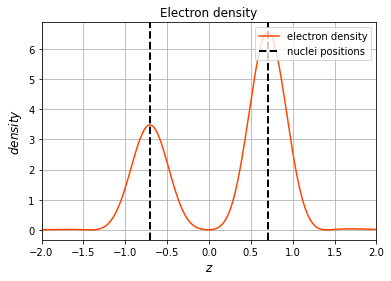

In [11]:
%pylab inline
z = np.linspace(-2,2, 300)
r = np.zeros([300,3])
r[:,-1] = z

import matplotlib.pyplot as plt 
fig, ax = plt.subplots()

plot(z,electron_density(r), color='orangered', label="electron density")
ax.set_xlabel(r'$z$', fontsize=12)
ax.set_ylabel(r'$density$', fontsize=12)
ax.set_title('Electron density')
ax.axvline(0.70053, linestyle='--', linewidth=2., color='black', label="nuclei positions")
ax.axvline(-0.70053, linestyle='--', linewidth=2., color='black')
ax.grid(True)
ax.set_xlim([-2,2])
ax.legend(loc=1); 

Cross-check whether the integration of electron density is equal number of electrons

In [ ]:
scf_exec.integrator_3D.integrate(electron_density)

# Summary

I have implemented the SCF procedure in python programing language. Python has several performance bugs, therefore it is not always sufficient for high performance computing tasks.

Nevertheless There is plenty of space for refactoring and optimization. Using scipy multidimensional integrators `scipy.integrate.nquad` took quite a long time, but maybe customizing it kwargs would also help in the future. 

Code should be open to extensions for other types of basis and types of integrators.

Calculation of our given system of H2 hydrogen molecule suffered from oscilating of the results. Also the given electron density is not satisfactory (We expected symetric electron density). The main cause was probably due to imperfectly computed two electron integrals which were significantly memory and performance consuming tasks.